In [1]:
import nmresearch as nmr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

In [3]:
"""
define delay tau1
"tau1 = d3*(1+cnst1+2*cnst2)-p1/2"
define delay tau2
"tau2 = d3*(1-cnst2)-p1"
define delay tau3
"tau3 = 2*d3*(1-cnst2)-p1"

define delay tau1p
"tau1p = d3*(1-cnst1+2*cnst2)-p1/2"
"""
def to_str(lst):
    return ["{:10.8f}".format(val) for val in lst]

cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]
c1=0.3
us = 10**-6
d3=5*us
p1=1.02*us
tau1 = [d3*(1 + c1 + 2*c2)-p1/2 for c2 in cnst2]
tau2 = [d3*(1-c2) - p1 for c2 in cnst2]
tau3 = [2*d3*(1-c2)-p1 for c2 in cnst2]
tau1p = [d3 * (1 - c1 + 2 * c2) - p1/2 for c2 in cnst2]

str_list = []

str_list.append("define list<delay> tau1 = {" + " ".join(to_str(tau1)) + "}")
str_list.append("define list<delay> tau2 = {" + " ".join(to_str(tau2)) + "}")
str_list.append("define list<delay> tau3 = {" + " ".join(to_str(tau3)) + "}")
str_list.append("define list<delay> tau1p = {" + " ".join(to_str(tau1p)) + "}")

print(f"\n".join(str_list))


define list<delay> tau1 = {0.00000599 0.00000609 0.00000619 0.00000629 0.00000639 0.00000649 0.00000699 0.00000749 0.00000799 0.00000849 0.00000899 0.00000949}
define list<delay> tau2 = {0.00000398 0.00000393 0.00000388 0.00000383 0.00000378 0.00000373 0.00000348 0.00000323 0.00000298 0.00000273 0.00000248 0.00000223}
define list<delay> tau3 = {0.00000898 0.00000888 0.00000878 0.00000868 0.00000858 0.00000848 0.00000798 0.00000748 0.00000698 0.00000648 0.00000598 0.00000548}
define list<delay> tau1p = {0.00000299 0.00000309 0.00000319 0.00000329 0.00000339 0.00000349 0.00000399 0.00000449 0.00000499 0.00000549 0.00000599 0.00000649}


In [4]:
vals=nmr.Experiment(391).load_tpc3d()
kicks=list(range(vals.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

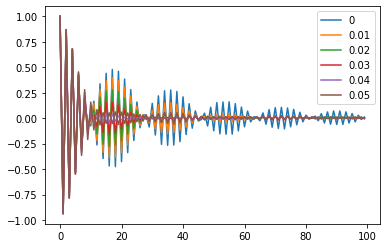

In [5]:
plt.plot(vals[0:6].transpose(),label=cnst2[0:6])
plt.legend()
plt.show()

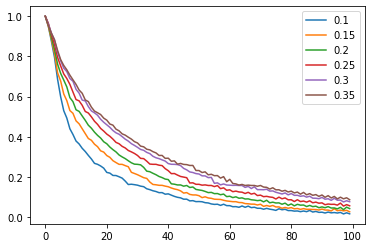

In [6]:
plt.plot(abs(vals[6:12].transpose()),label=cnst2[6:12])
plt.legend()
plt.show()

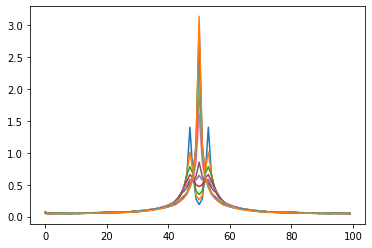

In [7]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals])
plt.plot(fourier.transpose())
plt.show()

In [8]:
off_res = np.array([ft[47] for ft in fourier])
res = np.array([ft[50] for ft in fourier])

cs_off = CubicSpline(cnst2, off_res)
cs_on = CubicSpline(cnst2, res)
xs = np.arange(0, 0.35, .001)


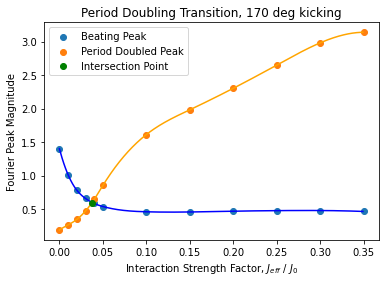

In [9]:
plt.scatter(cnst2, off_res, label="Beating Peak")
plt.plot(xs, cs_off(xs), "b")

plt.scatter(cnst2, res, label="Period Doubled Peak")
plt.plot(xs, cs_on(xs), "orange")


plt.xlabel(r'Interaction Strength Factor, $J_{eff}$ / $J_0$')
plt.ylabel("Fourier Peak Magnitude")
plt.title("Period Doubling Transition, 170 deg kicking")

idx = np.argwhere(np.diff(np.sign(cs_off(xs) - cs_on(xs)))).flatten()
plt.plot(xs[idx], cs_on(xs)[idx], 'go', label='Intersection Point')
cross170=xs[idx]

plt.legend()
plt.show()

In [10]:
#print(nmr.PulseProgram.dtc_ken16_compiled_8(160,9,n_max=100))

In [11]:
vals=nmr.Experiment(393).load_tpc3d()
kicks=list(range(vals.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

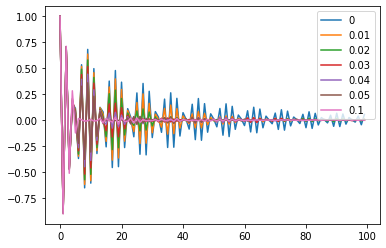

In [12]:
plt.plot(vals[0:7].transpose(),label=cnst2[0:7])
plt.legend()
plt.show()

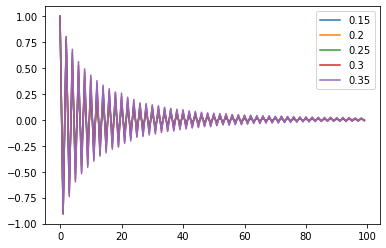

In [13]:
plt.plot(vals[7:12].transpose(),label=cnst2[7:12])
plt.legend()
plt.show()

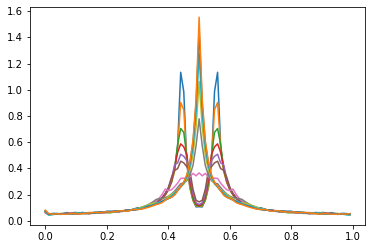

In [14]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals])
plt.plot(freq,fourier.transpose())
plt.show()

In [15]:
off_res = np.array([ft[44] for ft in fourier])
res = np.array([ft[50] for ft in fourier])

cs_off = CubicSpline(cnst2, off_res)
cs_on = CubicSpline(cnst2, res)
xs = np.arange(0, 0.35, .001)


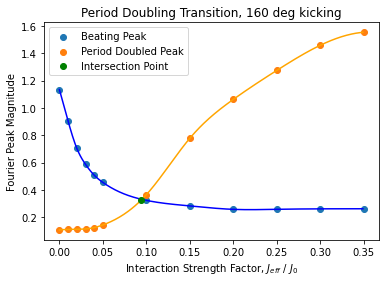

In [16]:
plt.scatter(cnst2, off_res, label="Beating Peak")
plt.plot(xs, cs_off(xs), "b")

plt.scatter(cnst2, res, label="Period Doubled Peak")
plt.plot(xs, cs_on(xs), "orange")


plt.xlabel(r'Interaction Strength Factor, $J_{eff}$ / $J_0$')
plt.ylabel("Fourier Peak Magnitude")
plt.title("Period Doubling Transition, 160 deg kicking")

idx = np.argwhere(np.diff(np.sign(cs_off(xs) - cs_on(xs)))).flatten()
plt.plot(xs[idx], cs_on(xs)[idx], 'go', label='Intersection Point')
cross160=xs[idx]

plt.legend()
plt.show()

In [17]:
#print(nmr.PulseProgram.dtc_ken16_compiled_8(165,8,n_max=100))

In [18]:
#vals=nmr.Experiment(394).load_tpc3d()
vals=nmr.Experiment(402).load_tpc3d()
kicks=list(range(vals.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-165)/360

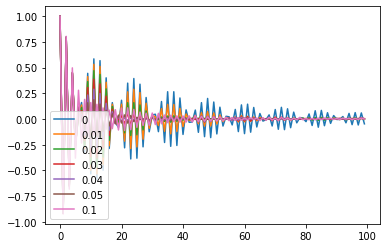

In [19]:
plt.plot(vals[0:7].transpose(),label=cnst2[0:7])
plt.legend()
plt.show()

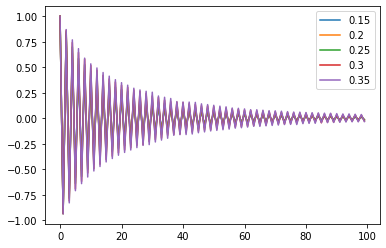

In [20]:
plt.plot(vals[7:12].transpose(),label=cnst2[7:12])
plt.legend()
plt.show()

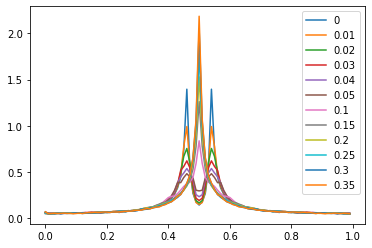

In [21]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals])
plt.plot(freq,fourier.transpose(),label=cnst2)
plt.legend()
plt.show()

In [22]:
off_res = np.array([ft[46] for ft in fourier])
res = np.array([ft[50] for ft in fourier])

cs_off = CubicSpline(cnst2, off_res)
cs_on = CubicSpline(cnst2, res)
xs = np.arange(0, 0.35, .001)


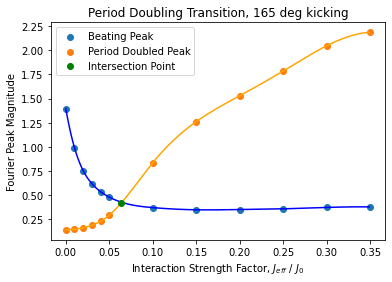

In [23]:
plt.scatter(cnst2, off_res, label="Beating Peak")
plt.plot(xs, cs_off(xs), "b")

plt.scatter(cnst2, res, label="Period Doubled Peak")
plt.plot(xs, cs_on(xs), "orange")


plt.xlabel(r'Interaction Strength Factor, $J_{eff}$ / $J_0$')
plt.ylabel("Fourier Peak Magnitude")
plt.title("Period Doubling Transition, 165 deg kicking")

idx = np.argwhere(np.diff(np.sign(cs_off(xs) - cs_on(xs)))).flatten()
plt.plot(xs[idx], cs_on(xs)[idx], 'go', label='Intersection Point')
cross165=xs[idx]

plt.legend()
plt.show()

In [24]:
#print(nmr.PulseProgram.dtc_ken16_compiled_8(175,9,n_max=100))

In [25]:
vals=nmr.Experiment(398).load_tpc3d()
kicks=list(range(vals.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-175)/360

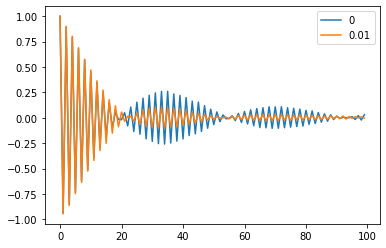

In [26]:
plt.plot(vals[0:2].transpose(),label=cnst2[0:2])
plt.legend()
plt.show()

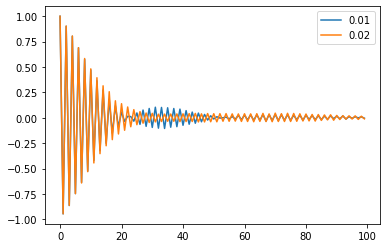

In [27]:
plt.plot(vals[1:3].transpose(),label=cnst2[1:3])
plt.legend()
plt.show()

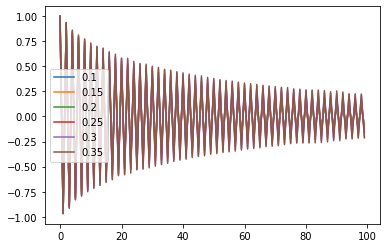

In [28]:
plt.plot(vals[6:12].transpose(),label=cnst2[6:12])
plt.legend()
plt.show()

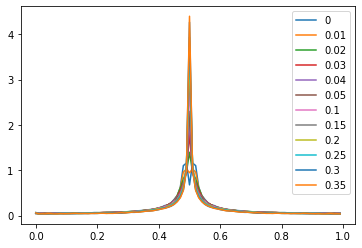

In [29]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals])
plt.plot(freq,fourier.transpose(),label=cnst2)
plt.legend()
plt.show()

In [30]:
off_res = np.array([ft[51] for ft in fourier])
res = np.array([ft[50] for ft in fourier])

cs_off = CubicSpline(cnst2, off_res)
cs_on = CubicSpline(cnst2, res)
xs = np.arange(0, 0.35, .001)


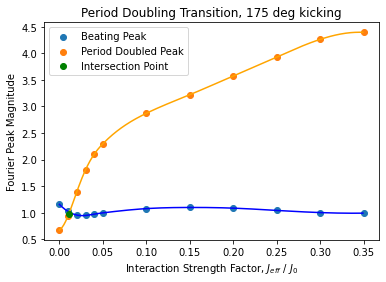

In [31]:
plt.scatter(cnst2, off_res, label="Beating Peak")
plt.plot(xs, cs_off(xs), "b")

plt.scatter(cnst2, res, label="Period Doubled Peak")
plt.plot(xs, cs_on(xs), "orange")


plt.xlabel(r'Interaction Strength Factor, $J_{eff}$ / $J_0$')
plt.ylabel("Fourier Peak Magnitude")
plt.title("Period Doubling Transition, 175 deg kicking")

idx = np.argwhere(np.diff(np.sign(cs_off(xs) - cs_on(xs)))).flatten()
plt.plot(xs[idx], cs_on(xs)[idx], 'go', label='Intersection Point')
cross175=xs[idx]

plt.legend()
plt.show()

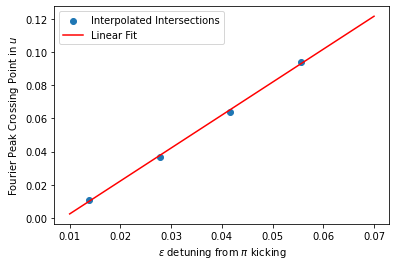

fit: y=m*x+b, m=1.987, b=-0.017


In [32]:
crossing_list=np.array([cross160[0], cross165[0], cross170[0], cross175[0]]).flatten()
theta_list = [160, 165, 170, 175]
eps_list = [(180-theta)/360 for theta in theta_list]

p = np.polyfit(eps_list, crossing_list, 1)
xp = np.linspace(.01, .07, 100)

plt.scatter(eps_list, crossing_list, label="Interpolated Intersections")
plt.plot(xp, xp*p[0]+p[1],"r-", label="Linear Fit")
plt.xlabel(r"$\epsilon$ detuning from $\pi$ kicking")
plt.ylabel(r"Fourier Peak Crossing Point in $u$")
plt.legend()
plt.show()

print('fit: y=m*x+b, m=%5.3f, b=%5.3f' % tuple(p))

In [33]:
"""
define delay tau1
"tau1 = d3*(1+cnst1+2*cnst2)-p1/2"
define delay tau2
"tau2 = d3*(1-cnst2)-p1"
define delay tau3
"tau3 = 2*d3*(1-cnst2)-p1"

define delay tau1p
"tau1p = d3*(1-cnst1+2*cnst2)-p1/2"
"""
def to_str(lst):
    return ["{:10.8f}".format(val) for val in lst]

cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
c1=0.0
us = 10**-6
d3=5*us
p1=1.02*us
tau1 = [d3*(1 + c1 + 2*c2)-p1/2 for c2 in cnst2]
tau2 = [d3*(1-c2) - p1 for c2 in cnst2]
tau3 = [2*d3*(1-c2)-p1 for c2 in cnst2]
tau1p = [d3 * (1 - c1 + 2 * c2) - p1/2 for c2 in cnst2]

str_list = []

str_list.append("define list<delay> tau1 = {" + " ".join(to_str(tau1)) + "}")
str_list.append("define list<delay> tau2 = {" + " ".join(to_str(tau2)) + "}")
str_list.append("define list<delay> tau3 = {" + " ".join(to_str(tau3)) + "}")
str_list.append("define list<delay> tau1p = {" + " ".join(to_str(tau1p)) + "}")

print(f"\n".join(str_list))


define list<delay> tau1 = {0.00000449 0.00000459 0.00000469 0.00000479 0.00000489 0.00000499 0.00000509 0.00000519 0.00000529 0.00000539 0.00000549}
define list<delay> tau2 = {0.00000398 0.00000393 0.00000388 0.00000383 0.00000378 0.00000373 0.00000368 0.00000363 0.00000358 0.00000353 0.00000348}
define list<delay> tau3 = {0.00000898 0.00000888 0.00000878 0.00000868 0.00000858 0.00000848 0.00000838 0.00000828 0.00000818 0.00000808 0.00000798}
define list<delay> tau1p = {0.00000449 0.00000459 0.00000469 0.00000479 0.00000489 0.00000499 0.00000509 0.00000519 0.00000529 0.00000539 0.00000549}


In [72]:
vals_global = nmr.Experiment(451).load_tpc3d()

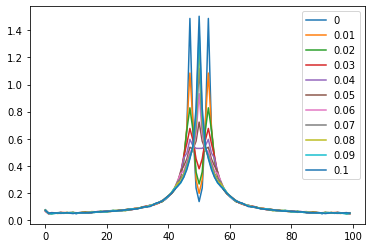

In [73]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals_global])
plt.plot(fourier.transpose(), label=cnst2)
plt.legend()
plt.show()

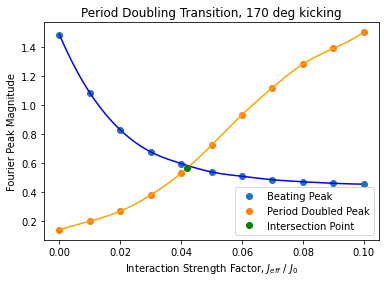

In [74]:
off_res = np.array([ft[47] for ft in fourier])
res = np.array([ft[50] for ft in fourier])

cs_off = CubicSpline(cnst2, off_res)
cs_on = CubicSpline(cnst2, res)
xs = np.arange(0, 0.1, .001)


plt.scatter(cnst2, off_res, label="Beating Peak")
plt.plot(xs, cs_off(xs), "b")

plt.scatter(cnst2, res, label="Period Doubled Peak")
plt.plot(xs, cs_on(xs), "orange")


plt.xlabel(r'Interaction Strength Factor, $J_{eff}$ / $J_0$')
plt.ylabel("Fourier Peak Magnitude")
plt.title("Period Doubling Transition, 170 deg kicking")

idx = np.argwhere(np.diff(np.sign(cs_off(xs) - cs_on(xs)))).flatten()
plt.plot(xs[idx], cs_on(xs)[idx], 'go', label='Intersection Point')
cross170_dis=xs[idx]

plt.legend()
plt.show()

In [75]:
cross170

array([0.037])

In [76]:
cross170_dis

array([0.042])

In [77]:
vals_local=nmr.Experiment(455).load_tpc3d()

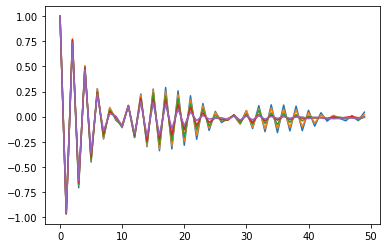

In [78]:
plt.plot(vals_local[0:5].transpose(),label=cnst2[0:5])
plt.show()

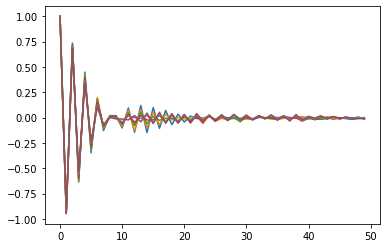

In [79]:
plt.plot(vals_local[5:11].transpose(),label=cnst2[5:11])
plt.show()

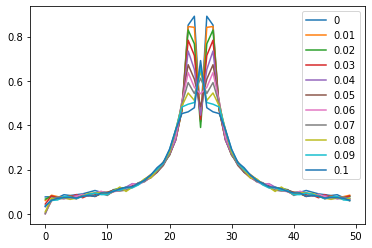

In [80]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals_local])
plt.plot(fourier.transpose(), label=cnst2)
plt.legend()
plt.show()

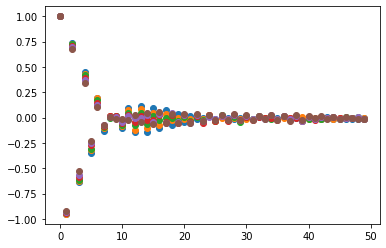

In [81]:
plt.scatter(list(range(50)),vals_local[5])
plt.scatter(list(range(50)),vals_local[6])
plt.scatter(list(range(50)),vals_local[7])
plt.scatter(list(range(50)),vals_local[8])
plt.scatter(list(range(50)),vals_local[9])
plt.scatter(list(range(50)),vals_local[10])

In [97]:
colors=['#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4']

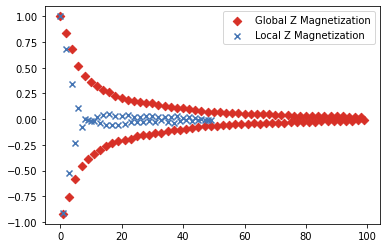

In [107]:
plt.scatter(list(range(100)), vals_global[10], label=r"Global Z Magnetization",color=colors[0],marker="D")
plt.scatter(list(range(50)), vals_local[10], label=r"Local Z Magnetization",color=colors[-1],marker="x")
plt.legend()
plt.savefig('local_v_global.pdf')  
plt.show()